In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize , sent_tokenize
import re


import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
original_movies = pd.read_csv("train_data.txt", delimiter=":::", header = None )
original_movies.drop(0,axis=1 , inplace= True)

In [3]:
original_movies.columns = ["Title", "Genre" , "Description"]

In [4]:
original_movies.head()

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [5]:
# creating a new column for the years
years = []
for i in original_movies["Title"]:
    year = i.split("(")[1].split(")")[0]
    years.append(year)

In [6]:
original_movies["Year"] = years

### Subset dataset to work on fewer samples

In [7]:
movies = original_movies.iloc[:15000,:].copy()
movies.head()

,Title,Genre,Description,Year
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,2009
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,1997
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,1980
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1915
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,2007


In [8]:
print(f"Original Movies : {original_movies.shape}")
print(f"sampled Movies : {movies.shape}")

Original Movies : (54214, 4)
sampled Movies : (15000, 4)


### Random Countvectorizer method without any preprocessing

In [9]:
encoder = LabelEncoder()
y = encoder.fit_transform(movies["Genre"])

In [10]:
cv = CountVectorizer()
X = cv.fit_transform(movies["Description"])


In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=64)

In [12]:
NB_model = MultinomialNB(alpha=0.2)
NB_model.fit(X_train , y_train)


MultinomialNB(alpha=0.2)

In [13]:
y_preds = NB_model.predict(X_test)

In [14]:
accuracy_score(y_test , y_preds)

0.52

In [15]:
# checking the effect of alpha on predictions
accuracies = []
alphas = np.arange(0,2,0.1)

for alpha in alphas:
    NB_model = MultinomialNB(alpha=alpha)
    NB_model.fit(X_train , y_train)
    y_preds = NB_model.predict(X_test)
    accuracies.append(accuracy_score(y_test , y_preds))

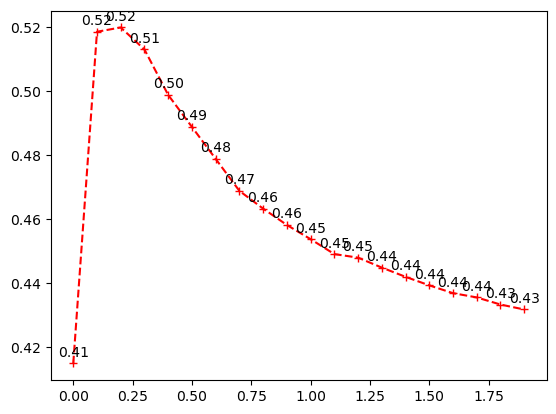

In [16]:
plt.plot(alphas , accuracies, color ="red", marker = '+', linestyle ="dashed",)
for i, txt in enumerate(accuracies):
    plt.annotate(f'{txt:.2f}', (alphas[i], accuracies[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

#### The best score for MultiNomialNB is achieving at the value Alpha=0.2 with around 56% accuracy.

# Training the model on whole dataset now and testing the results



In [17]:
y = encoder.fit_transform(original_movies["Genre"])
X = cv.fit_transform(original_movies["Description"])
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=64)

NB_model = MultinomialNB(alpha=0.2)
NB_model.fit(X_train , y_train)

y_preds = NB_model.predict(X_test)

accuracy_score(y_test , y_preds)

0.562311712265601

In [18]:
y = encoder.fit_transform(original_movies["Genre"])
X = cv.fit_transform(original_movies["Description"])
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.3 , random_state=64)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train , y_train)

y_preds = lr_model.predict(X_test)

accuracy_score(y_test , y_preds)

0.5693206271134338

# Trying the same above models with preprocessing techniques


1) Removal of stop words
2) Stemming or Lemmatization
3) TF-iDF

In [19]:
# Defining the Lemmatizer and the Stemming Objects
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [20]:
original_new_descriptions = []

for i in original_movies["Description"]:
    #print(i)
    # remove words other than Alphabets
    description = re.sub('[^a-zA-z]'," ", i)
    description = description.lower()
    description = description.split()
    description = [stemmer.stem(word) for word in description if not word in stopwords.words("english")]
    #print(description)
    description = " ".join(description)
    original_new_descriptions.append(description)

In [21]:
tfidf = TfidfVectorizer(max_features=7000)

In [22]:
X = tfidf.fit_transform(original_new_descriptions)

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.3 , random_state=64)

In [24]:
NB_tf_model = MultinomialNB(alpha =0.1)
NB_tf_model.fit(X_train , y_train)

MultinomialNB(alpha=0.1)

In [25]:
y_preds = NB_tf_model.predict(X_test)

In [26]:
accuracy_score(y_test , y_preds)

0.5500153704272979

In [27]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train , y_train)
    temp_preds = temp_classifier.predict(X_test)
    accuracy = accuracy_score(y_test , temp_preds)
    print(f"The accuracy score for alpha={i} is : {round(accuracy*100,2)}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        alpha_val = i

print(f"The best accuracy is {round(best_accuracy*100,2)} with alpha={alpha_val}")

The accuracy score for alpha=0.1 is : 55.0
The accuracy score for alpha=0.2 is : 54.56
The accuracy score for alpha=0.30000000000000004 is : 54.13
The accuracy score for alpha=0.4 is : 53.7
The accuracy score for alpha=0.5 is : 53.24
The accuracy score for alpha=0.6 is : 52.79
The accuracy score for alpha=0.7000000000000001 is : 52.39
The accuracy score for alpha=0.8 is : 51.94
The accuracy score for alpha=0.9 is : 51.56
The best accuracy is 55.0 with alpha=0.1


In [28]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train , y_train)

LogisticRegression(max_iter=200)

In [29]:
lr_preds = lr_model.predict(X_test)
accuracy_score(y_test , lr_preds)

0.5846910544113126

##### We have created the stemmed dataframe and the lemmatized dataframe as doing the stemming and lemmatizing taking a lof of time to our dataset . Hence saved those two new_descriptions into a new dataframes to be used directly.

Two datasets used below are 
1) Stemmed_train_data.csv - Contains the Genres and the corresponding Stemmed Descriptions.
2) Lemmatized_train_data.csv - Contains the Genres and the corresponding Lemmatized Descriptions.

### MultionomialNB with Stemmed and Lemmatized descriptions

In [30]:
stemmed_data = pd.read_csv("Stemmed_train_data.csv")
y = stemmed_data["Genres"]
new_descriptions = stemmed_data["Stemmed_Descriptions"]
tfidf = TfidfVectorizer(max_features=7000)
X = tfidf.fit_transform(new_descriptions)
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.3 , random_state=64)
NB_tf_model = MultinomialNB(alpha =0.1)
NB_tf_model.fit(X_train , y_train)
y_preds = NB_tf_model.predict(X_test)
accuracy_score(y_test , y_preds)


0.5500153704272979

In [31]:
lemmatized_data = pd.read_csv("Lemmatized_train_data.csv")
y = lemmatized_data["Genres"]
new_descriptions = lemmatized_data["Lemmatized_descriptions"]
tfidf = TfidfVectorizer(max_features=6000)
X = tfidf.fit_transform(new_descriptions)
X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.3 , random_state=64)
NB_tf_model = MultinomialNB(alpha =0.1)
NB_tf_model.fit(X_train , y_train)
y_preds = NB_tf_model.predict(X_test)
accuracy_score(y_test , y_preds)

0.5514294497387028

### Logistic Regression with Stemmed and Lemmatized descriptions

In [32]:
lemmatized_data = pd.read_csv("Stemmed_train_data.csv")

y = lemmatized_data["Genres"]
new_descriptions = lemmatized_data["Stemmed_Descriptions"]

tfidf = TfidfVectorizer(max_features=6000)
X = tfidf.fit_transform(new_descriptions)


X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.3 , random_state=64)

lr_model = LogisticRegression(max_iter=2000)

lr_model.fit(X_train , y_train)

y_preds = lr_model.predict(X_test)

accuracy_score(y_test , y_preds)

0.5869043959422072

In [33]:
lemmatized_data = pd.read_csv("Lemmatized_train_data.csv")

y = lemmatized_data["Genres"]
new_descriptions = lemmatized_data["Lemmatized_descriptions"]

tfidf = TfidfVectorizer(max_features=6000)

X = tfidf.fit_transform(new_descriptions)

X_train , X_test , y_train , y_test = train_test_split(X, y , test_size=0.3 , random_state=64)

lr_model = LogisticRegression(max_iter=2000)

lr_model.fit(X_train , y_train)

y_preds = lr_model.predict(X_test)

accuracy_score(y_test , y_preds)

0.5838303104826315

In [34]:
# Load the lemmatized data
lemmatized_data = pd.read_csv("Lemmatized_train_data.csv")

# Separate features and target variable
y = lemmatized_data["Genres"]
new_descriptions = lemmatized_data["Lemmatized_descriptions"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(new_descriptions, y, test_size=0.3, random_state=64)

# Tfidf Vectorization
tfidf = TfidfVectorizer(max_features=6000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)

lr_model = LogisticRegression(max_iter=1500 , C=1 , solver='lbfgs')
lr_model.fit(X_train_tfidf , y_train)
y_preds_best = lr_model.predict(X_test_tfidf)
accuracy_score(y_test, y_preds_best)

0.5835229019366739

# Neural Networks Model for Genre Classification

In [35]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Softmax, Dropout
from scipy.sparse import coo_matrix, csr_matrix
from keras.optimizers import RMSprop

# Read the data
original_movies = pd.read_csv("train_data.txt", delimiter=":::", header=None)
original_movies.drop(0, axis=1, inplace=True)
original_movies.columns = ["Title", "Genre", "Description"]

# Encode labels
encoder = LabelEncoder()
original_movies['label'] = encoder.fit_transform(original_movies['Genre'].values)

# Get the number of unique labels
num_unique_labels = original_movies['Genre'].nunique()

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(original_movies['Description'].values,
                                                    original_movies['label'].values,
                                                    test_size=0.2,
                                                    random_state=0)

# Vectorize text data
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
features = vectorizer.fit_transform(x_train)
features_test = vectorizer.transform(x_test)

# Reorder sparse matrix indices
def sort_csr(m):
    coo = m.tocoo()
    sorted_coo = coo_matrix((coo.data, (coo.row, coo.col)), shape=m.shape).tocsr()
    return sorted_coo

features = sort_csr(features)
features_test = sort_csr(features_test)

#model architecture
model = Sequential()
model.add(Dense(512, input_shape=(features.shape[1],), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_unique_labels, activation='softmax'))

# Compile the model
model.compile(optimizer=RMSprop(lr=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(features, y_train, validation_data=(features_test, y_test), epochs=20, batch_size=700)



Epoch 1/20
62/62 [==============================] - 14s 211ms/step - loss: 3.1026 - accuracy: 0.2524 - val_loss: 2.7300 - val_accuracy: 0.2385
Epoch 2/20
62/62 [==============================] - 13s 205ms/step - loss: 2.4992 - accuracy: 0.2792 - val_loss: 2.2452 - val_accuracy: 0.4336
Epoch 3/20
62/62 [==============================] - 13s 204ms/step - loss: 2.2487 - accuracy: 0.3699 - val_loss: 2.0668 - val_accuracy: 0.4394
Epoch 4/20
62/62 [==============================] - 13s 204ms/step - loss: 2.0576 - accuracy: 0.4332 - val_loss: 1.9421 - val_accuracy: 0.4427
Epoch 5/20
62/62 [==============================] - 13s 205ms/step - loss: 1.9185 - accuracy: 0.4630 - val_loss: 1.8607 - val_accuracy: 0.4637
Epoch 6/20
62/62 [==============================] - 13s 207ms/step - loss: 1.7883 - accuracy: 0.4966 - val_loss: 1.7908 - val_accuracy: 0.5011
Epoch 7/20
62/62 [==============================] - 13s 206ms/step - loss: 1.6630 - accuracy: 0.5419 - val_loss: 1.7293 - val_accuracy: 0.5276

In [36]:
# Evaluate the model on test data
_, test_accuracy = model.evaluate(features_test, y_test)
print("Final Accuracy on Test Data:", test_accuracy)

339/339 [==============================] - 2s 4ms/step - loss: 1.9765 - accuracy: 0.5354
Final Accuracy on Test Data: 0.5353684425354004


# Conclusion

1) Tried just with the Countvectorizer along with MultinomialNB and we got around 56.23% accuracy on validation set , Logistic Regression with 56.93% accuracy.
2) Tried Removing stopwords , stemmed and lemmatized the descriptions to try them on the above two models namely NB , LogisticRegression
    - Stemmed Descriptions
        1) MultiNomialNB - **55.00**
        2) Logistic Regression - **55.14**
    - Lemmatized Decsriptions -
        1) MultiNomialNB - **_58.69_**
        2) Logistic Regression - **58.38**
       
3) With Neural Networks architecture - **53** accuracy